<a href="https://colab.research.google.com/github/thinethwic/ai-diabetes-risk-prediction-app/blob/branch1/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls "/content/drive/MyDrive/diabetes (1).csv"

In [10]:
df = pd.read_csv("/content/drive/MyDrive/diabetes (1).csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
print("Data Set Informations")
df.info()

Data Set Informations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
print("FInd Missing Values!")
print(df.isnull().sum())

FInd Missing Values!
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [48]:
X = df[["Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = df['Outcome']

In [49]:
numerical_features = ["Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"]

print("\nNumerical Features to be Scaled:")
print(numerical_features)


Numerical Features to be Scaled:
['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (614, 6)
X_test shape: (154, 6)


In [51]:
# preprocess feature
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



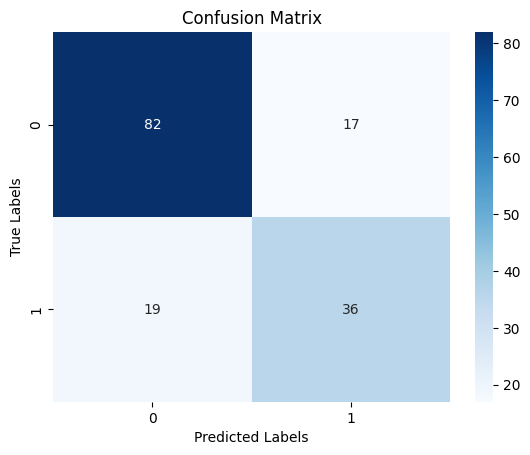

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)

# classification report
y_pred = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix Report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



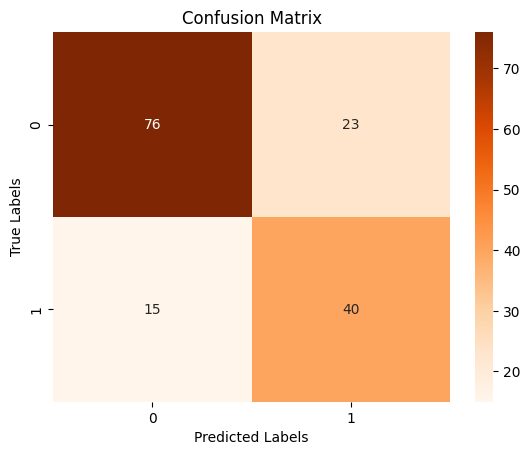

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

# classification report
yd_pred = dt_pipeline.predict(X_test)
print(classification_report(y_test, yd_pred))

# Confusion Matrix Report
cm = confusion_matrix(y_test, yd_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



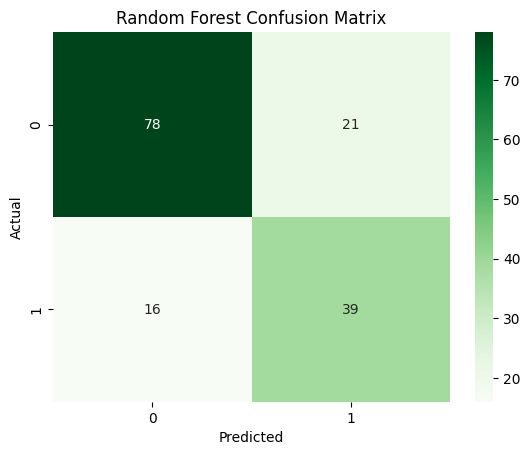

In [56]:
# create full pipeline from random forest
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

rf_pipeline.fit(X_train, y_train)

# classification report
yr_pred = rf_pipeline.predict(X_test)
print(classification_report(y_test, yr_pred))

# Confusion Matrix Report
cm = confusion_matrix(y_test, yr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'F1-Score (class 1)': [
        f1_score(y_test, y_pred, pos_label=1),
        f1_score(y_test, yd_pred, pos_label=1),
        f1_score(y_test, yr_pred, pos_label=1)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, yd_pred),
        accuracy_score(y_test, yr_pred)
    ]
}


performance_df = pd.DataFrame(model_performance).sort_values(by='F1-Score (class 1)', ascending=False)

print("--- Model Performance Comparison ---")
print(performance_df)

print("\n🏆 BEST MODEL SELECTION 🏆")
print("Based on the F1-Score for predicting 'Leave' (class 1), the Random Forest Classifier is the best model for this task.")

--- Model Performance Comparison ---
                 Model  F1-Score (class 1)  Accuracy
2        Random Forest            0.678261  0.759740
1        Decision Tree            0.677966  0.753247
0  Logistic Regression            0.666667  0.766234

🏆 BEST MODEL SELECTION 🏆
Based on the F1-Score for predicting 'Leave' (class 1), the Random Forest Classifier is the best model for this task.


In [59]:
model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'F1-Score (class 1)': [
        f1_score(y_test, y_pred, pos_label=1),
        f1_score(y_test, yd_pred, pos_label=1),
        f1_score(y_test, yr_pred, pos_label=1)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, yd_pred),
        accuracy_score(y_test, yr_pred)
    ]
}


performance_df = pd.DataFrame(model_performance).sort_values(by='F1-Score (class 1)', ascending=False)

print("--- Model Performance Comparison ---")
display(performance_df)

print("\n🏆 BEST MODEL SELECTION 🏆")
print("Based on the F1-Score for predicting 'Outcome' (class 1), the Random Forest Classifier is the best model for this task.")

--- Model Performance Comparison ---


,Model,F1-Score (class 1),Accuracy
2,Random Forest,0.678261,0.759740
1,Decision Tree,0.677966,0.753247
0,Logistic Regression,0.666667,0.766234



🏆 BEST MODEL SELECTION 🏆
Based on the F1-Score for predicting 'Outcome' (class 1), the Random Forest Classifier is the best model for this task.


In [61]:
#save the model to google drive
import joblib
filename = '/content/drive/MyDrive/diabetes.joblib'
joblib.dump(rf_pipeline, filename)

['/content/drive/MyDrive/diabetes.joblib']

In [60]:
# save the best model
import joblib
filename = 'diabetes.joblib'
joblib.dump(rf_pipeline, filename)

['diabetes.joblib']